In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models # type: ignore
from tensorflow.keras.applications import EfficientNetB0 # type: ignore
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint # type: ignore

In [2]:
img_size = (224, 224)
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE
data_dir = "data"

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.


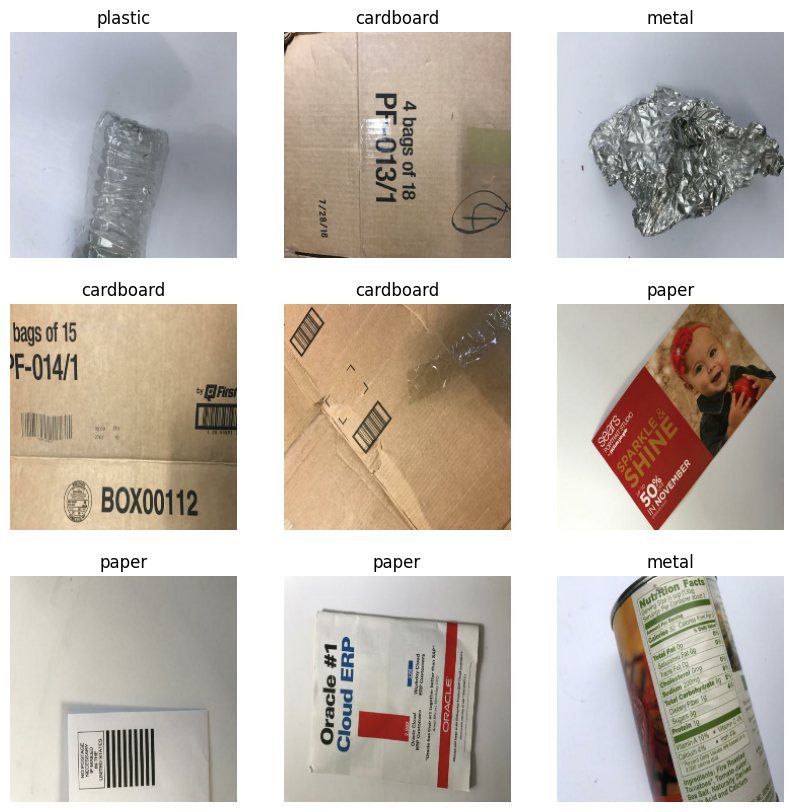

In [4]:
import matplotlib.pyplot as plt

image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[label_batch[i].numpy().argmax()])
    plt.axis("off")
plt.show()

In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

Found 2527 files belonging to 6 classes.
Using 505 files for validation.


In [6]:
num_classes = len(train_ds.class_names)
num_classes

6

In [7]:
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

In [22]:
base_model = EfficientNetB0(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False

In [ ]:
inputs = layers.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.efficientnet.preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs, outputs)

In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
    'best_model.h5', save_best_only=True, monitor='val_loss', mode='min'
)

callbacks = [early_stopping, model_checkpoint]

In [15]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 44s 691ms/step - accuracy: 0.9113 - loss: 0.2616 - val_accuracy: 0.8950 - val_loss: 0.2984
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 538ms/step - accuracy: 0.9250 - loss: 0.2456

64/64 ━━━━━━━━━━━━━━━━━━━━ 43s 669ms/step - accuracy: 0.9249 - loss: 0.2456 - val_accuracy: 0.8950 - val_loss: 0.2922
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 573ms/step - accuracy: 0.9143 - loss: 0.2605

64/64 ━━━━━━━━━━━━━━━━━━━━ 45s 703ms/step - accuracy: 0.9144 - loss: 0.2603 - val_accuracy: 0.8931 - val_loss: 0.2899
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 600ms/step - accuracy: 0.9164 - loss: 0.2546

64/64 ━━━━━━━━━━━━━━━━━━━━ 47s 729ms/step - accuracy: 0.9164 - loss: 0.2546 - val_accuracy: 0.8911 - val_loss: 0.2897
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 552ms/step - accuracy: 0.9350 - loss: 0.2276

64/64 ━━━━━━━━━━━━━━━━━━━━ 44s 681ms/step - accuracy: 0.9350 - loss: 0.2276 - val_accuracy: 0.8970 - val_loss: 0.2862
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 570ms/step - accuracy: 0.9159 - loss: 0.2372

64/64 ━━━━━━━━━━━━━━━━━━━━ 47s 735ms/step - accuracy: 0.9159 - loss: 0.2371 - val_accuracy: 0.8990 - val_loss: 0.2834
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 44s 679ms/step - accuracy: 0.9291 - loss: 0.2170 - val_accuracy: 0.8950 - val_loss: 0.2846
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - accuracy: 0.9359 - loss: 0.2218

64/64 ━━━━━━━━━━━━━━━━━━━━ 43s 678ms/step - accuracy: 0.9359 - loss: 0.2215 - val_accuracy: 0.8950 - val_loss: 0.2811
Epoch 9/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 553ms/step - accuracy: 0.9358 - loss: 0.2116

64/64 ━━━━━━━━━━━━━━━━━━━━ 43s 678ms/step - accuracy: 0.9358 - loss: 0.2116 - val_accuracy: 0.8911 - val_loss: 0.2791
Epoch 10/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 552ms/step - accuracy: 0.9266 - loss: 0.2237

64/64 ━━━━━━━━━━━━━━━━━━━━ 44s 682ms/step - accuracy: 0.9267 - loss: 0.2234 - val_accuracy: 0.8871 - val_loss: 0.2789
Epoch 11/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 551ms/step - accuracy: 0.9272 - loss: 0.2040

64/64 ━━━━━━━━━━━━━━━━━━━━ 43s 679ms/step - accuracy: 0.9273 - loss: 0.2040 - val_accuracy: 0.8950 - val_loss: 0.2729
Epoch 12/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 43s 670ms/step - accuracy: 0.9355 - loss: 0.2055 - val_accuracy: 0.8911 - val_loss: 0.2760
Epoch 13/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 548ms/step - accuracy: 0.9283 - loss: 0.2183

64/64 ━━━━━━━━━━━━━━━━━━━━ 43s 679ms/step - accuracy: 0.9284 - loss: 0.2180 - val_accuracy: 0.8950 - val_loss: 0.2696
Epoch 14/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 44s 684ms/step - accuracy: 0.9363 - loss: 0.2006 - val_accuracy: 0.8931 - val_loss: 0.2751
Epoch 15/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 43s 671ms/step - accuracy: 0.9353 - loss: 0.1919 - val_accuracy: 0.9030 - val_loss: 0.2756
Epoch 16/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 44s 689ms/step - accuracy: 0.9333 - loss: 0.1943 - val_accuracy: 0.8950 - val_loss: 0.2796
Epoch 17/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 44s 695ms/step - accuracy: 0.9333 - loss: 0.1912 - val_accuracy: 0.8950 - val_loss: 0.2804
Epoch 18/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 44s 694ms/step - accuracy: 0.9366 - loss: 0.1926 - val_accuracy: 0.8970 - val_loss: 0.2741


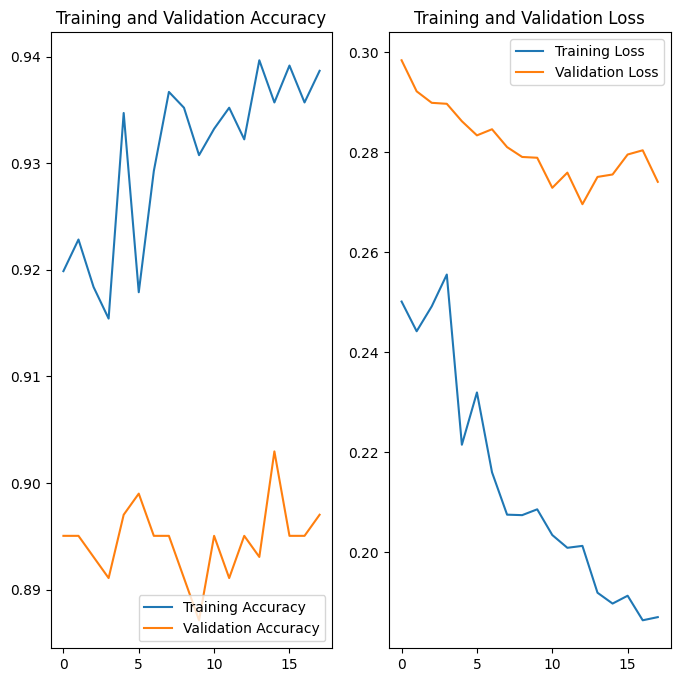

In [16]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [3]:
import numpy as np
from tensorflow.keras.preprocessing import image # type: ignore

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)
    return img_array

In [6]:
from tensorflow.keras.models import load_model # type: ignore
from tensorflow.keras.preprocessing import image # type: ignore

model = load_model('best_model.h5')

img_path = r'E:/Projects/TrashNet/data/paper/paper16.jpg'

img_array = preprocess_image(img_path)

predictions = model.predict(img_array)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([[3.0551534e-03, 4.3460535e-04, 4.6903282e-05, 9.9558145e-01,
        8.3407504e-04, 4.7792026e-05]], dtype=float32)

In [7]:
class_names = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]

predicted_class = np.argmax(predictions, axis=1)
class_name = class_names[predicted_class[0]]

print(f"Predicted class is: {class_name}")

Predicted class is: paper
